<a href="https://colab.research.google.com/github/omkar111999/omkar111999/blob/main/decision_tree_on_car_puchased_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [90]:
df = pd.read_csv('/content/car_data.csv')


In [91]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [93]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


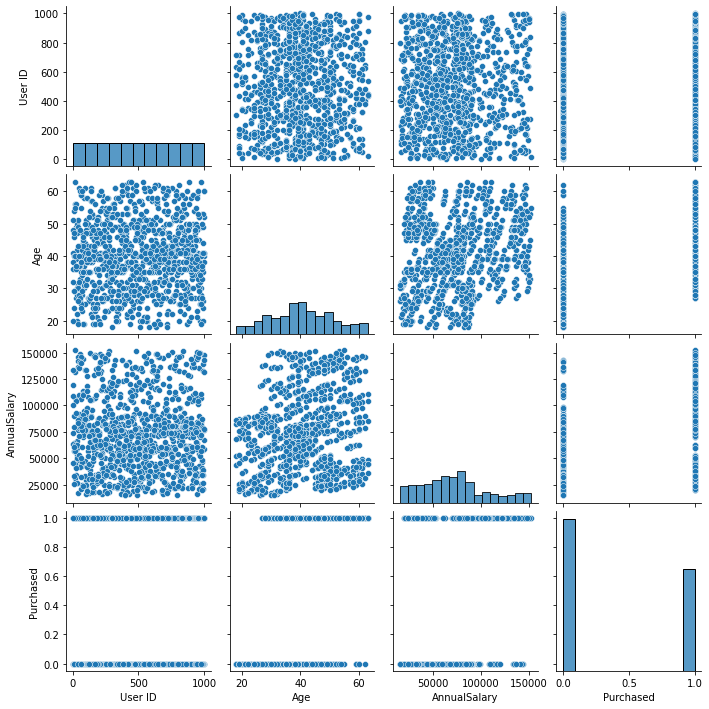

In [94]:
sns.pairplot(df)

In [95]:
df.loc[df.Purchased == 1].groupby('Gender').Purchased.value_counts()

Gender  Purchased
Female  1            219
Male    1            183
Name: Purchased, dtype: int64

In [96]:
df.loc[df.Purchased == 0].groupby('Gender').Purchased.value_counts()

Gender  Purchased
Female  0            297
Male    0            301
Name: Purchased, dtype: int64

In [97]:
df.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997    Female
998    Female
999    Female
Name: Gender, Length: 1000, dtype: object

In [98]:
df['Gender'].fillna('male', inplace=True )

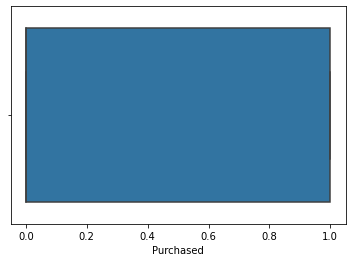

In [99]:
sns.boxplot(x=df["Purchased"])

In [100]:
df['gender_num'] = df['Gender'].map({'Male': 1, 'Female': 0}).astype(int)
print(df['Gender'].value_counts())
print(df['gender_num'].value_counts())  

Female    516
Male      484
Name: Gender, dtype: int64
0    516
1    484
Name: gender_num, dtype: int64


In [101]:
df.Purchased.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [102]:
df.loc[df.Purchased == 1].groupby('Gender').Purchased.value_counts()

Gender  Purchased
Female  1            219
Male    1            183
Name: Purchased, dtype: int64

In [103]:
df.loc[df.Purchased == 0].groupby('Gender').Purchased.value_counts()

Gender  Purchased
Female  0            297
Male    0            301
Name: Purchased, dtype: int64

In [104]:
from sklearn import tree

features= ['gender_num', 'Age','AnnualSalary']
print("Features",features)

X = df[features]
print("X shape", X.shape)
y = df['Purchased']
print("Y shape", y.shape)

Features ['gender_num', 'Age', 'AnnualSalary']
X shape (1000, 3)
Y shape (1000,)


In [105]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=2)
DTree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

|--- Age <= 44.50
|   |--- AnnualSalary <= 90750.00
|   |   |--- class: 0
|   |--- AnnualSalary >  90750.00
|   |   |--- class: 1
|--- Age >  44.50
|   |--- Age <= 47.50
|   |   |--- class: 1
|   |--- Age >  47.50
|   |   |--- class: 1



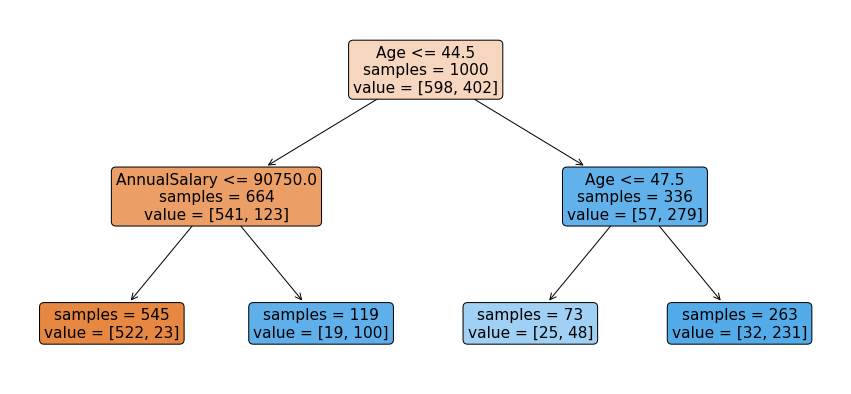

In [106]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [107]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy*100)

[[522  76]
 [ 23 379]]
90.10000000000001
